### Importa le librerie

In [17]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel
import matplotlib.pyplot as plt

### Simulated data

In [18]:
# Simulating data
np.random.seed(42)
n = 1000

loan_to_value = np.random.uniform(0.5, 1.5, n)
credit_score = np.random.normal(700, 50, n)
loan_term = np.random.choice([12, 24, 36, 48, 60], n)

beta_mean = 1 / (1 + np.exp(-(0.5 * loan_to_value - 0.005 * credit_score + 0.01 * loan_term)))
beta_precision = 20
lgd = stats.beta.rvs(beta_mean * beta_precision, (1 - beta_mean) * beta_precision)

# Ensure LGD is strictly between 0 and 1
lgd = np.clip(lgd, 0.0001, 0.9999)

data = pd.DataFrame({
    'LoanToValue': loan_to_value,
    'CreditScore': credit_score,
    'LoanTerm': loan_term,
    'LGD': lgd
})

### Preparing the data

In [19]:
X = data[['LoanToValue', 'CreditScore', 'LoanTerm']]
y = data['LGD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Implementing beta regression

In [20]:


# Implementing Beta Regression
X_train_const = sm.add_constant(X_train)

# Fit the beta regression model
model = BetaModel(y_train, X_train_const)
results = model.fit()

print(results.summary())

# Making predictions
X_test_const = sm.add_constant(X_test)
y_pred = results.predict(X_test_const)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae:.4f}")



                              BetaModel Results                               
Dep. Variable:                    LGD   Log-Likelihood:                 1404.4
Model:                      BetaModel   AIC:                            -2799.
Method:            Maximum Likelihood   BIC:                            -2775.
Date:                Tue, 22 Oct 2024                                         
Time:                        14:56:57                                         
No. Observations:                 800                                         
Df Residuals:                     795                                         
Df Model:                           3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4897      0.395      1.239      0.215      -0.285       1.264
LoanToValue     0.4131      0.090      4.572     

In [21]:
X_test_const = sm.add_constant(X_test)
y_pred = results.predict(X_test_const)

# Calculate Mean Absolute Error
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 0.0397


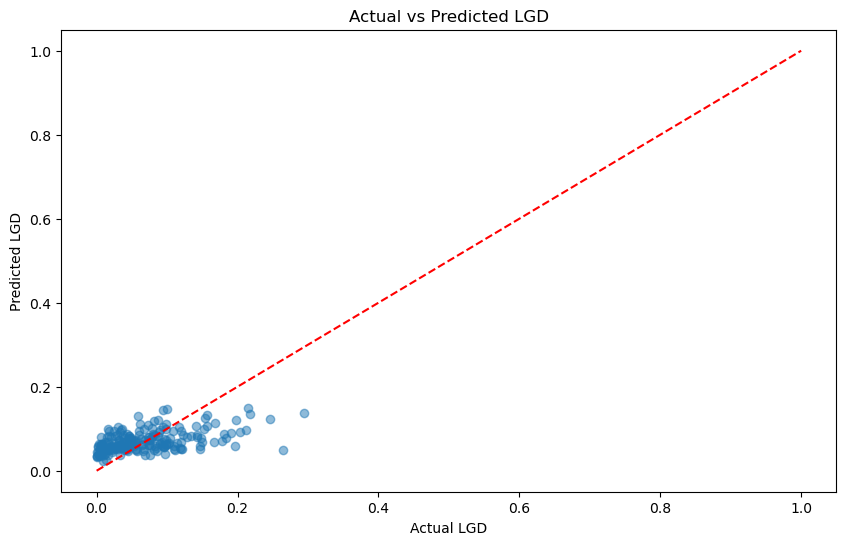

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual LGD")
plt.ylabel("Predicted LGD")
plt.title("Actual vs Predicted LGD")
plt.show()